In [14]:
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [15]:
data = pd.read_csv("C:/Users/Moon/Desktop/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [16]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [17]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수1,강우A1,강우B1,강우C1,강우D1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,7,8,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,6.3,7,8,7,8,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,6.4,7,9,7,8,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,7.3,7,10,7,8,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,8.2,7,12,8,10,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


In [18]:
X=X.drop(X.iloc[:,12:], axis=1)
X.head(3)

,홍수사상번호,연,월,일,시간,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1,수위D1
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,7,8,2.54,122.56875
1,1.0,2006.0,7.0,10.0,9.0,6.3,7,8,7,8,2.53,122.56250
2,1.0,2006.0,7.0,10.0,10.0,6.4,7,9,7,8,2.53,122.55625


In [19]:
y.head(3)

0    189.100000
1    216.951962
2    251.424419
Name: 유입량, dtype: float64

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
sc.fit(X[['유역평균강수1', '강우A1', '강우B1', '강우C1', '강우D1', '수위E1', '수위D1']])
X[['유역평균강수1', '강우A1', '강우B1', '강우C1', '강우D1', '수위E1', '수위D1']] = sc.transform(X[['유역평균강수1', '강우A1', '강우B1', '강우C1', '강우D1', '수위E1', '수위D1']])
X

KeyError: "['수위D1'] not in index"

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2109996, shuffle=False)

In [33]:
rf = RandomForestRegressor()

In [35]:
scores = []
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

In [39]:
predict = cross_val_predict(rf, X_test, cv=10)
expectid = y_test

TypeError: fit() missing 1 required positional argument: 'y'

In [38]:
print('RMSE: {}'.format(mean_squared_error(expected, predict, squared=False)))

ValueError: Found input variables with inconsistent numbers of samples: [610, 2281]

In [12]:
np.sqrt(np.mean(-scores))

1269.638717989331

In [27]:
predict = rf.predict(X_test)
expected = y_test

In [28]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 594.1275190484606


<function matplotlib.pyplot.show(close=None, block=None)>

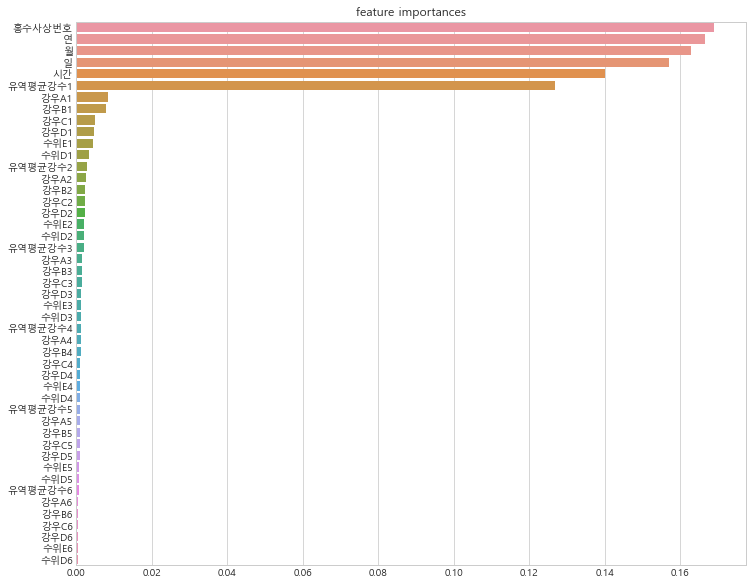

In [67]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

In [16]:
param_grid = {
    'n_estimators' : [10, 30, 50, 100, 200],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [3, 5, 7, 10],
    'min_samples_split' : [2, 3, 5, 10]
}

In [18]:
rf_grid = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  7.4min finished


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
print('점수 : {}'.format(np.sqrt(-rf_grid.best_score_)))
print('최적 파라미터 : {}'.format(rf_grid.best_params_))

점수 : 1077.6507091150727
최적 파라미터 : {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


In [20]:
rf = RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=3)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=3)

In [21]:
predict = rf.predict(X_test)
expected = y_test

In [22]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 515.8016557382389


## 유역평균강수 제거

In [39]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")

In [40]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [41]:
X = X.drop(['유역평균강수1', '유역평균강수2', '유역평균강수3', '유역평균강수4', '유역평균강수5', '유역평균강수6'], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [43]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
predict = rf.predict(X_test)
expected = y_test

In [45]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 626.6936122884766


<function matplotlib.pyplot.show(close=None, block=None)>

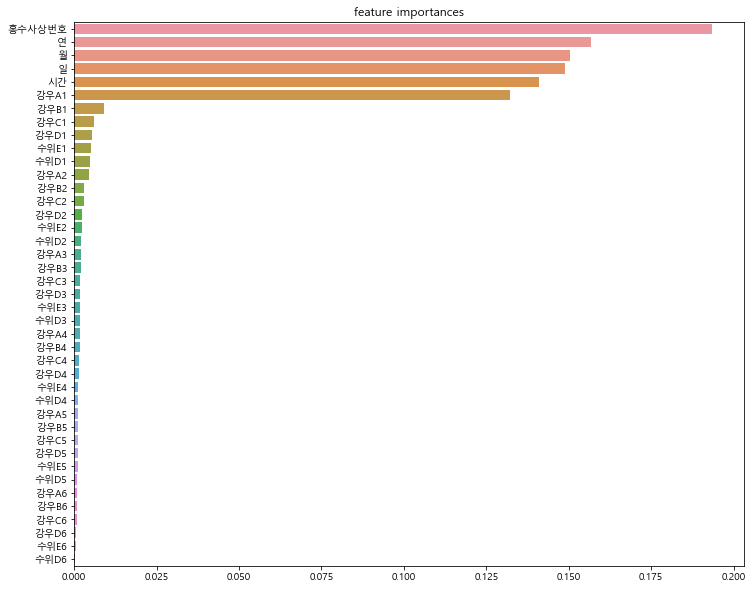

In [46]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 파생변수 생성

In [58]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [59]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [60]:
X['강우E1'] = X['유역평균강수1']*5 - X['강우A1'] - X['강우B1'] - X['강우C1'] - X['강우D1']
X['강우E2'] = X['유역평균강수2']*5 - X['강우A2'] - X['강우B2'] - X['강우C2'] - X['강우D2']
X['강우E3'] = X['유역평균강수3']*5 - X['강우A3'] - X['강우B3'] - X['강우C3'] - X['강우D3']
X['강우E4'] = X['유역평균강수4']*5 - X['강우A4'] - X['강우B4'] - X['강우C4'] - X['강우D4']
X['강우E5'] = X['유역평균강수5']*5 - X['강우A5'] - X['강우B5'] - X['강우C5'] - X['강우D5']
X['강우E6'] = X['유역평균강수6']*5 - X['강우A6'] - X['강우B6'] - X['강우C6'] - X['강우D6']

In [61]:
X = X.drop(['유역평균강수1', '유역평균강수2', '유역평균강수3', '유역평균강수4', '유역평균강수5', '유역평균강수6'], axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [63]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
predict = rf.predict(X_test)
expected = y_test

In [65]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 571.7844671283027


<function matplotlib.pyplot.show(close=None, block=None)>

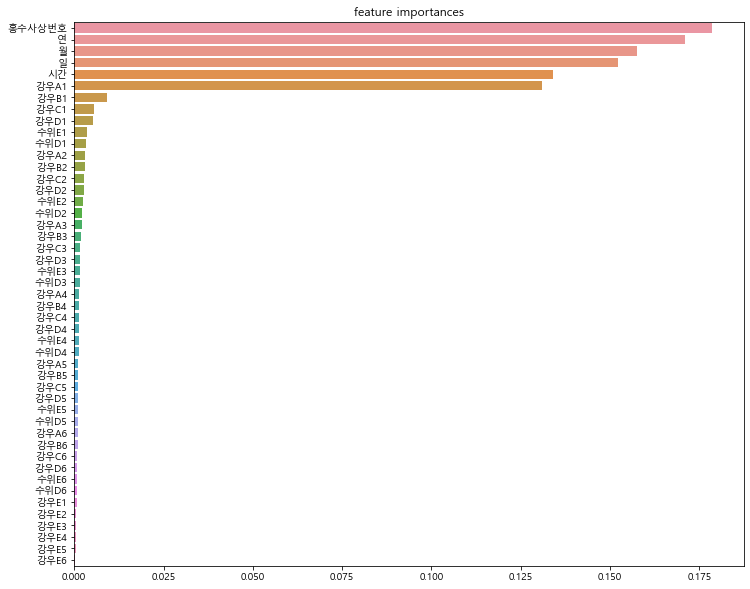

In [66]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 1~5열 데이터 삭제

In [7]:
X = X.drop(X.iloc[:,0:5], axis=1)

In [8]:
X.head()

,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1,수위D1,유역평균강수2,강우A2,강우B2,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,6.4,7,7,7,8,2.54,122.56875,6.3,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,6.3,7,8,7,8,2.53,122.56250,6.4,7,8,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,6.4,7,9,7,8,2.53,122.55625,7.3,7,9,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,7.3,7,10,7,8,2.53,122.55625,8.2,7,10,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,8.2,7,12,8,10,2.53,122.55625,11.3,9,12,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
predict = rf.predict(X_test)
expected = y_test

In [12]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 662.659381464761


<function matplotlib.pyplot.show(close=None, block=None)>

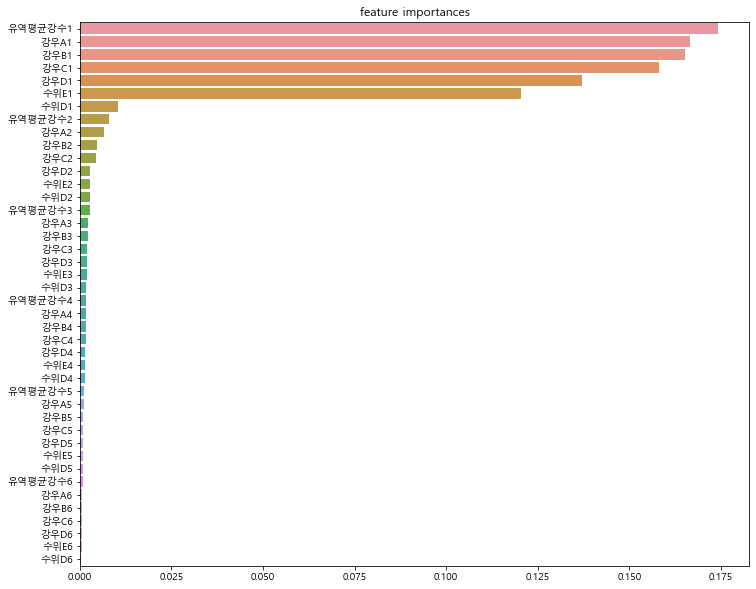

In [13]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

In [67]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [69]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [70]:
X['강우E1'] = X['유역평균강수1']*5 - X['강우A1'] - X['강우B1'] - X['강우C1'] - X['강우D1']
X['강우E2'] = X['유역평균강수2']*5 - X['강우A2'] - X['강우B2'] - X['강우C2'] - X['강우D2']
X['강우E3'] = X['유역평균강수3']*5 - X['강우A3'] - X['강우B3'] - X['강우C3'] - X['강우D3']
X['강우E4'] = X['유역평균강수4']*5 - X['강우A4'] - X['강우B4'] - X['강우C4'] - X['강우D4']
X['강우E5'] = X['유역평균강수5']*5 - X['강우A5'] - X['강우B5'] - X['강우C5'] - X['강우D5']
X['강우E6'] = X['유역평균강수6']*5 - X['강우A6'] - X['강우B6'] - X['강우C6'] - X['강우D6']

In [71]:
X = X.drop(['유역평균강수1', '유역평균강수2', '유역평균강수3', '유역평균강수4', '유역평균강수5', '유역평균강수6'], axis=1)

In [72]:
X = X.drop(X.iloc[:,0:5], axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [74]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
predict = rf.predict(X_test)
expected = y_test

In [76]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 591.6070944229779


<function matplotlib.pyplot.show(close=None, block=None)>

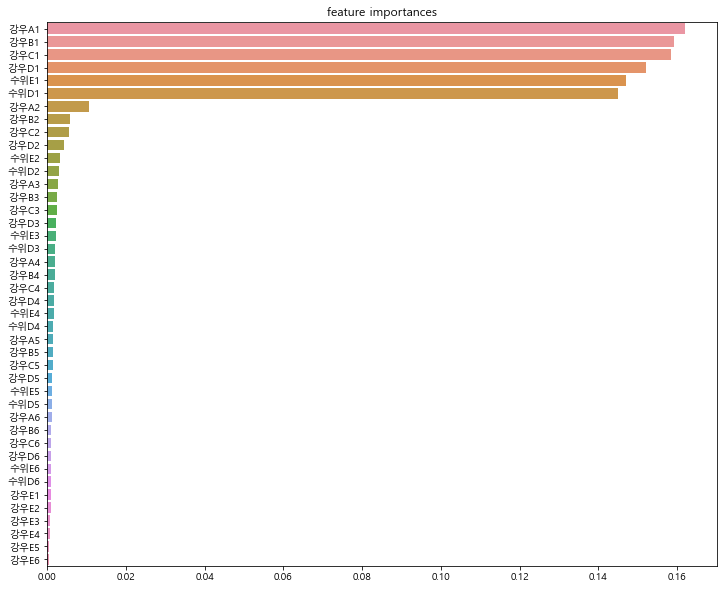

In [77]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 데이터 집단 1

In [740]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [741]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [742]:
X = X.drop(X.iloc[:, 11:], axis=1)

In [743]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,7,8,2.54
1,1.0,2006.0,7.0,10.0,9.0,6.3,7,8,7,8,2.53
2,1.0,2006.0,7.0,10.0,10.0,6.4,7,9,7,8,2.53
3,1.0,2006.0,7.0,10.0,11.0,7.3,7,10,7,8,2.53
4,1.0,2006.0,7.0,10.0,12.0,8.2,7,12,8,10,2.53


In [744]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [745]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [746]:
predict = rf.predict(X_test)
expected = y_test

In [747]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 617.9174283551171


<function matplotlib.pyplot.show(close=None, block=None)>

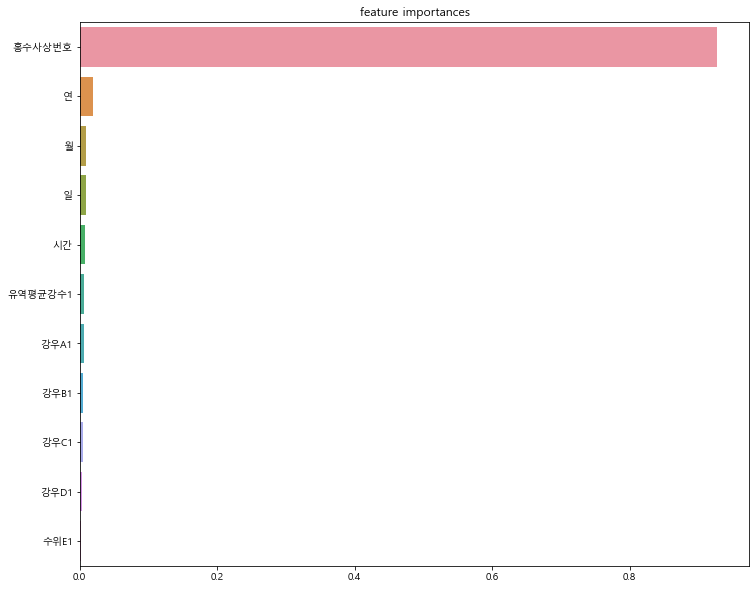

In [748]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 데이터 집단 2

In [749]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [750]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [751]:
X = X.drop(X.iloc[:, 5:12], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [752]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수2,강우A2,강우B2,강우C2,강우D2,수위E2,수위D2
0,1.0,2006.0,7.0,10.0,8.0,6.3,7,7,7,8,2.54,122.541667
1,1.0,2006.0,7.0,10.0,9.0,6.4,7,8,7,8,2.53,122.550000
2,1.0,2006.0,7.0,10.0,10.0,7.3,7,9,7,8,2.53,122.558333
3,1.0,2006.0,7.0,10.0,11.0,8.2,7,10,8,8,2.53,122.566667
4,1.0,2006.0,7.0,10.0,12.0,11.3,9,12,10,10,2.53,122.575000


In [753]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [754]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [755]:
predict = rf.predict(X_test)
expected = y_test

In [756]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 631.5457431767628


<function matplotlib.pyplot.show(close=None, block=None)>

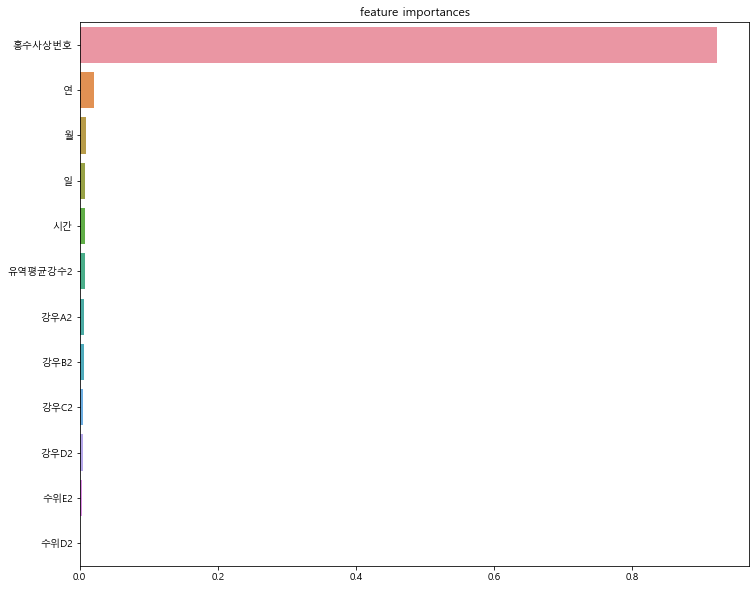

In [757]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 데이터 집단 3

In [758]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [759]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [760]:
X = X.drop(X.iloc[:, 5:19], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [761]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수3,강우A3,강우B3,강우C3,강우D3,수위E3,수위D3
0,1.0,2006.0,7.0,10.0,8.0,6.3,7,7,7,8,2.54,122.550000
1,1.0,2006.0,7.0,10.0,9.0,6.4,7,8,7,8,2.53,122.558333
2,1.0,2006.0,7.0,10.0,10.0,7.3,7,9,8,8,2.53,122.566667
3,1.0,2006.0,7.0,10.0,11.0,8.2,7,10,10,10,2.53,122.575000
4,1.0,2006.0,7.0,10.0,12.0,11.3,9,12,10,11,2.53,122.575000


In [762]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [763]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [764]:
predict = rf.predict(X_test)
expected = y_test

In [765]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 643.1391973432493


<function matplotlib.pyplot.show(close=None, block=None)>

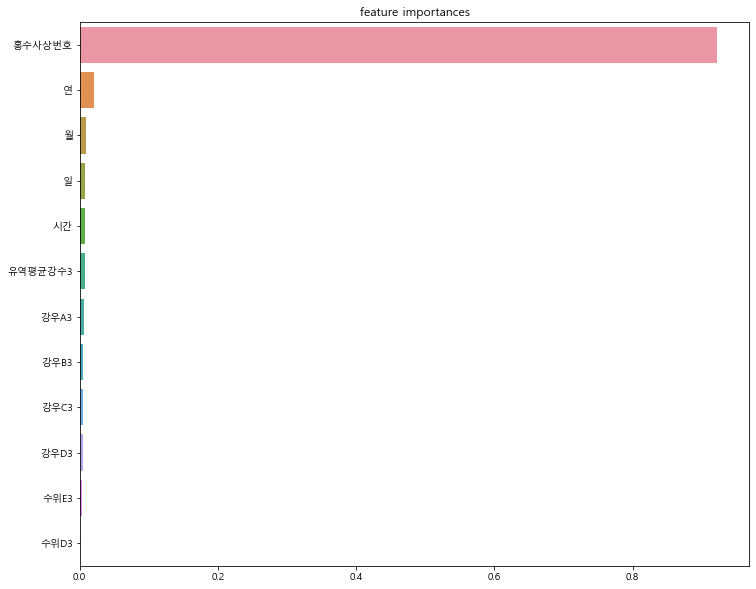

In [766]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 데이터 집단 4

In [767]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [768]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [769]:
X = X.drop(X.iloc[:, 5:26], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [770]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수4,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,8,8,2.54,122.675000
1,1.0,2006.0,7.0,10.0,9.0,7.3,7,8,10,10,2.53,122.667857
2,1.0,2006.0,7.0,10.0,10.0,8.2,7,9,10,11,2.53,122.660714
3,1.0,2006.0,7.0,10.0,11.0,11.3,9,10,15,14,2.53,122.653571
4,1.0,2006.0,7.0,10.0,12.0,14.4,12,12,18,16,2.53,122.639286


In [771]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [772]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [773]:
predict = rf.predict(X_test)
expected = y_test

In [774]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 526.1091281386325


<function matplotlib.pyplot.show(close=None, block=None)>

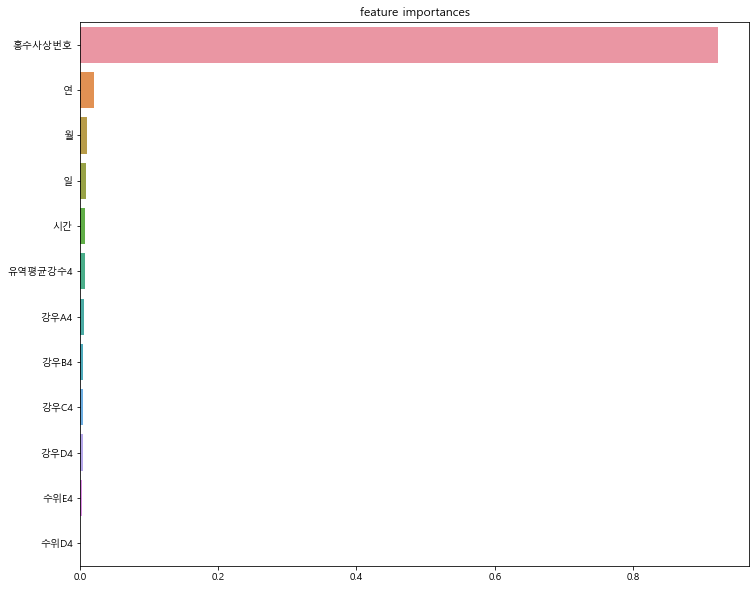

In [775]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 데이터 집단 5

In [776]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [777]:
X = data.drop(['유입량'], axis=1)
y = data['유입량']

In [778]:
X = X.drop(X.iloc[:, 5:33], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [779]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수5,강우A5,강우B5,강우C5,강우D5,수위E5,수위D5
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,8,8,2.54,122.660
1,1.0,2006.0,7.0,10.0,9.0,7.3,7,8,10,10,2.53,122.648
2,1.0,2006.0,7.0,10.0,10.0,8.2,7,9,10,11,2.53,122.636
3,1.0,2006.0,7.0,10.0,11.0,11.3,9,10,15,14,2.53,122.620
4,1.0,2006.0,7.0,10.0,12.0,14.4,12,12,18,16,2.53,122.604


In [780]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [781]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [782]:
predict = rf.predict(X_test)
expected = y_test

In [783]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 531.2438306009443


<function matplotlib.pyplot.show(close=None, block=None)>

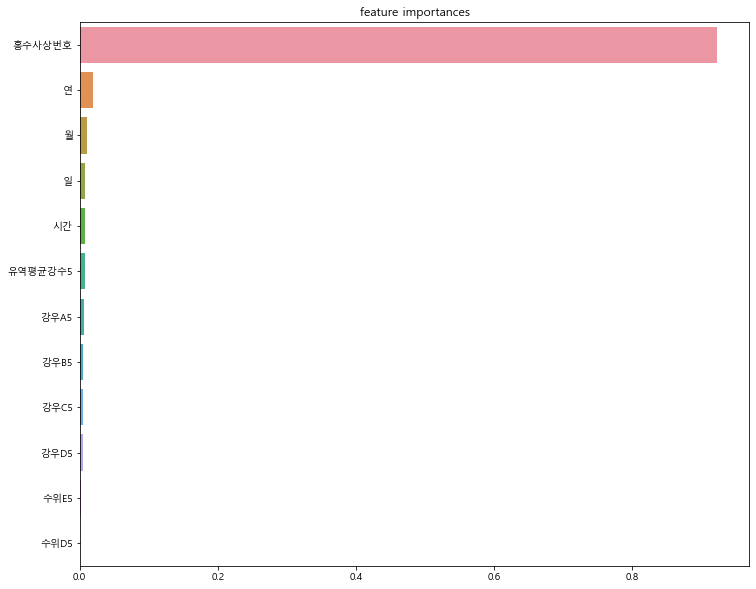

In [784]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## 데이터 집단 6

In [785]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [786]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [787]:
X = X.drop(X.iloc[:, 5:40], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [788]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,8,8,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,7.3,7,8,10,10,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,8.2,7,9,10,11,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,11.3,9,10,15,14,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,14.4,12,12,18,16,2.53,122.575


In [789]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [790]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [791]:
predict = rf.predict(X_test)
expected = y_test

In [792]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 570.8905706682372


<function matplotlib.pyplot.show(close=None, block=None)>

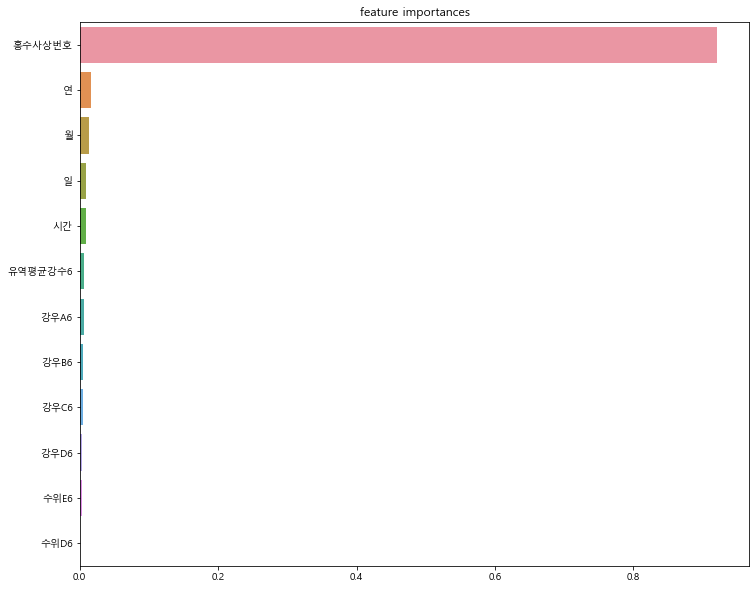

In [793]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show

## `앙상블`

In [794]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [795]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [796]:
X = X.drop(X.iloc[:, 11:], axis=1)

In [797]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,7,8,2.54
1,1.0,2006.0,7.0,10.0,9.0,6.3,7,8,7,8,2.53
2,1.0,2006.0,7.0,10.0,10.0,6.4,7,9,7,8,2.53
3,1.0,2006.0,7.0,10.0,11.0,7.3,7,10,7,8,2.53
4,1.0,2006.0,7.0,10.0,12.0,8.2,7,12,8,10,2.53


In [582]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [583]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [584]:
predict1 = rf.predict(X_test)
expected = y_test

In [585]:
print('RMSE : {}'.format(mean_squared_error(expected, predict1, squared=False)))

RMSE : 629.6473799822024


In [586]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [587]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [588]:
X = X.drop(X.iloc[:, 5:12], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [589]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수2,강우A2,강우B2,강우C2,강우D2,수위E2,수위D2
0,1.0,2006.0,7.0,10.0,8.0,6.3,7,7,7,8,2.54,122.541667
1,1.0,2006.0,7.0,10.0,9.0,6.4,7,8,7,8,2.53,122.550000
2,1.0,2006.0,7.0,10.0,10.0,7.3,7,9,7,8,2.53,122.558333
3,1.0,2006.0,7.0,10.0,11.0,8.2,7,10,8,8,2.53,122.566667
4,1.0,2006.0,7.0,10.0,12.0,11.3,9,12,10,10,2.53,122.575000


In [590]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [591]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [592]:
predict2 = rf.predict(X_test)
expected = y_test

In [593]:
print('RMSE : {}'.format(mean_squared_error(expected, predict2, squared=False)))

RMSE : 629.0678424629316


In [594]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [595]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [596]:
X = X.drop(X.iloc[:, 5:19], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [597]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수3,강우A3,강우B3,강우C3,강우D3,수위E3,수위D3
0,1.0,2006.0,7.0,10.0,8.0,6.3,7,7,7,8,2.54,122.550000
1,1.0,2006.0,7.0,10.0,9.0,6.4,7,8,7,8,2.53,122.558333
2,1.0,2006.0,7.0,10.0,10.0,7.3,7,9,8,8,2.53,122.566667
3,1.0,2006.0,7.0,10.0,11.0,8.2,7,10,10,10,2.53,122.575000
4,1.0,2006.0,7.0,10.0,12.0,11.3,9,12,10,11,2.53,122.575000


In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [599]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [600]:
predict3 = rf.predict(X_test)
expected = y_test

In [601]:
print('RMSE : {}'.format(mean_squared_error(expected, predict3, squared=False)))

RMSE : 632.5733177116458


In [602]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [603]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [604]:
X = X.drop(X.iloc[:, 5:26], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [605]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수4,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,8,8,2.54,122.675000
1,1.0,2006.0,7.0,10.0,9.0,7.3,7,8,10,10,2.53,122.667857
2,1.0,2006.0,7.0,10.0,10.0,8.2,7,9,10,11,2.53,122.660714
3,1.0,2006.0,7.0,10.0,11.0,11.3,9,10,15,14,2.53,122.653571
4,1.0,2006.0,7.0,10.0,12.0,14.4,12,12,18,16,2.53,122.639286


In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [607]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [608]:
predict4 = rf.predict(X_test)
expected = y_test

In [609]:
print('RMSE : {}'.format(mean_squared_error(expected, predict4, squared=False)))

RMSE : 540.5506739741411


In [610]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [611]:
X = data.drop(['유입량'], axis=1)
y = data['유입량']

In [612]:
X = X.drop(X.iloc[:, 5:33], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [613]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수5,강우A5,강우B5,강우C5,강우D5,수위E5,수위D5
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,8,8,2.54,122.660
1,1.0,2006.0,7.0,10.0,9.0,7.3,7,8,10,10,2.53,122.648
2,1.0,2006.0,7.0,10.0,10.0,8.2,7,9,10,11,2.53,122.636
3,1.0,2006.0,7.0,10.0,11.0,11.3,9,10,15,14,2.53,122.620
4,1.0,2006.0,7.0,10.0,12.0,14.4,12,12,18,16,2.53,122.604


In [614]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [615]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [616]:
predict5 = rf.predict(X_test)
expected = y_test

In [617]:
print('RMSE : {}'.format(mean_squared_error(expected, predict5, squared=False)))

RMSE : 523.0873005824448


In [618]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [619]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [620]:
X = X.drop(X.iloc[:, 5:40], axis=1)
X = X.drop(X.iloc[:, 12:], axis=1)

In [621]:
X.head()

,홍수사상번호,연,월,일,시간,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,6.4,7,7,8,8,2.54,122.610
1,1.0,2006.0,7.0,10.0,9.0,7.3,7,8,10,10,2.53,122.600
2,1.0,2006.0,7.0,10.0,10.0,8.2,7,9,10,11,2.53,122.590
3,1.0,2006.0,7.0,10.0,11.0,11.3,9,10,15,14,2.53,122.585
4,1.0,2006.0,7.0,10.0,12.0,14.4,12,12,18,16,2.53,122.575


In [622]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [623]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [624]:
predict6 = rf.predict(X_test)
expected = y_test

In [625]:
print('RMSE : {}'.format(mean_squared_error(expected, predict6, squared=False)))

RMSE : 589.6776099283887


In [627]:
predict = (predict1 + predict2 + predict3 + predict4 + predict5 + predict6)/6
print('Ensemble RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

Ensemble RMSE : 574.6966030483593


In [628]:
predict = (predict4 + predict5)/2
print('Ensemble RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

Ensemble RMSE : 529.794991965579


## 집단 3, 4 데이터로만 예측

In [830]:
data = pd.read_csv("C:/Users/korea/Desktop/문우혁/Github/BigContest_Flood-ZERO/문우혁/Data_Before/train.csv")
data.head(3)

,홍수사상번호,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,...,강우D5,수위E5,수위D5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,수위D6
0,1.0,2006.0,7.0,10.0,8.0,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.61
1,1.0,2006.0,7.0,10.0,9.0,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.60
2,1.0,2006.0,7.0,10.0,10.0,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.59


In [831]:
X = data.drop('유입량', axis=1)
y = data['유입량']

In [832]:
X = X.iloc[:,26:40]
X = X.drop(['유역평균강수4', '유역평균강수5'], axis=1)
X.head(3)

,강우A4,강우B4,강우C4,강우D4,수위E4,수위D4,강우A5,강우B5,강우C5,강우D5,수위E5,수위D5
0,7,7,8,8,2.54,122.675000,7,7,8,8,2.54,122.660
1,7,8,10,10,2.53,122.667857,7,8,10,10,2.53,122.648
2,7,9,10,11,2.53,122.660714,7,9,10,11,2.53,122.636


In [833]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [834]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [835]:
predict = rf.predict(X_test)
expected = y_test

In [836]:
print('RMSE : {}'.format(mean_squared_error(expected, predict, squared=False)))

RMSE : 687.0105265836701


<function matplotlib.pyplot.show(close=None, block=None)>

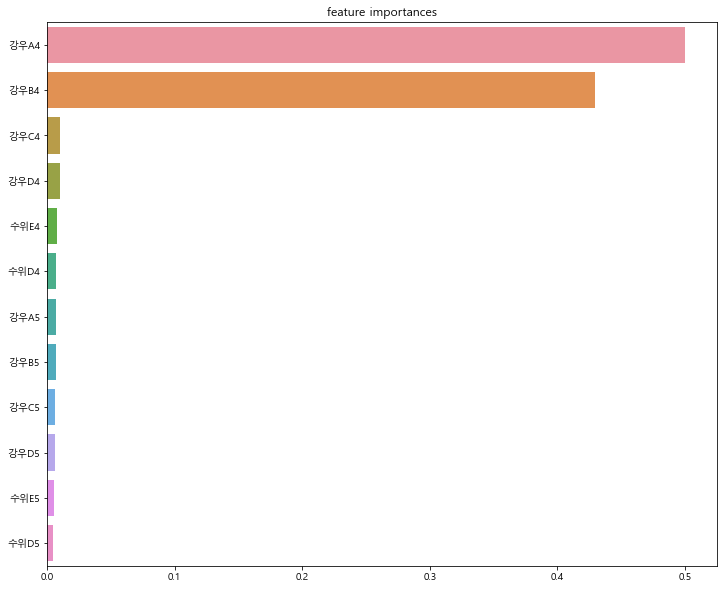

In [837]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title("feature importances")
sns.barplot(x=feature_importances, y=X_train.columns)
plt.show